In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import math
import seaborn as sns
from collections import OrderedDict
import pg8000
import sys
import os
import pathlib2
%matplotlib inline

In [2]:
home = pathlib2.Path.home()
full_path = home/"documents"/"github"/"SMART_goals"/"data"/"human_smart_data.csv"
full_path = str(full_path)
full_path
hdata = pd.read_csv(full_path)

In [3]:
hdata['layer'].fillna(0, inplace=True)
hdata['layer'] = hdata['layer'].astype(int)

hdata = hdata.rename(columns = {'recording_date':'count'})

hdata

,count,anno.res_index_label,patched_cell_container,name,63x_call,layer
0,2018-01-09,0.000000,P2S4_180109_054_A01,H18.03.002.11.03.01,63x go,2
1,2018-01-09,0.000000,P8S4_180109_357_A01,H18.03.002.11.06.01,63x no go,2
2,2018-01-09,1.000000,P8S4_180109_358_A01,H18.03.002.11.06.02,63x go,2
3,2018-01-09,0.000000,P8S4_180109_359_A01,H18.03.002.11.06.03,63x go,5
4,2018-01-09,0.504463,P8S4_180109_360_A01,H18.03.002.11.06.04,63x go,5
5,2018-01-09,0.000000,P9S4_180109_403_A01,H18.03.002.11.04.01,63x no go,2
6,2018-01-09,0.681172,P9S4_180109_404_A01,H18.03.002.11.04.02,63x no go,3
7,2018-01-09,0.000000,P9S4_180109_405_A01,H18.03.002.11.04.03,63x no go,2
8,2018-01-09,0.000000,P9S4_180109_406_A01,H18.03.002.11.04.04,63x no go,4
9,2018-02-01,0.537958,P9S4_180201_402_A01,H18.06.001.11.09.01,63x no go,5


In [4]:
hdata = hdata[['layer', 'count']]
hdata = hdata.groupby(['layer']).count().reset_index()

hdata

,layer,count
0,0,108
1,1,7
2,2,61
3,3,61
4,4,21
5,5,8


C:\Users\lisak\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


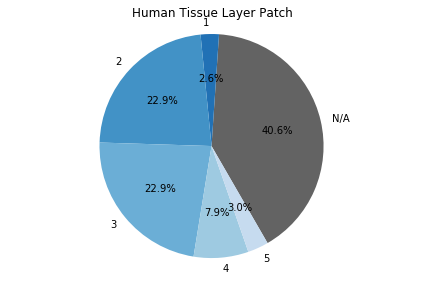

In [5]:
colors = ['#636363', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef']
labels = ['N/A', '1', '2', '3', '4', '5']

ax1 = hdata.plot(kind = 'pie', y='count', labels=labels, autopct='%1.1f%%',labeldistance=1.1, legend=False,
                title = 'Human Tissue Layer Patch', colors = colors, startangle = -60)
plt.axes().set_ylabel('')

ax1.axis('equal')
plt.tight_layout()